# SVM

In [2]:
#ライブラリの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#データセットの読み込み
from sklearn.datasets import load_iris
iris=load_iris()
X1=iris.data[:100,[2,3]]
y1=iris.target[:100]

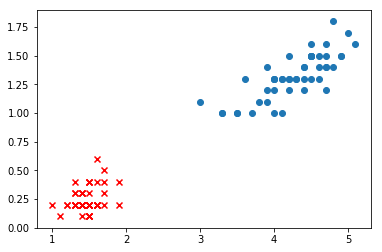

In [3]:
#散布図を表示(線形分離可能であるかどうかの確認)
plt.scatter(X1[:50,[0]],X1[:50,[1]],color="red",marker="x")
plt.scatter(X1[50:,[0]],X1[50:,[1]])
plt.show()

In [4]:
#データの標準化
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X1_std=ss.fit_transform(X1)

In [5]:
#ホールドアウト法
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test=train_test_split(X1_std,y1,
                                    test_size=0.3,random_state=0)

In [6]:
#データの学習
from sklearn.svm import SVC
svm1=SVC(kernel="linear")
svm1.fit(X1_train,y1_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

score:1.000000


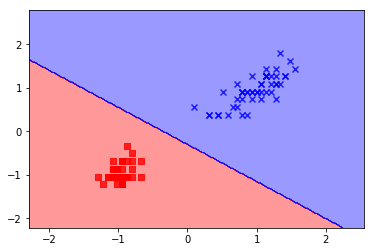

In [7]:
#決定曲線を出力する関数を定義
def plot_decision_regions(X, y, classifier, resolution=0.02):
    from matplotlib.colors import ListedColormap
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min()-1 , X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min()-1 , X[:, 1].max() +1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)

    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)


#決定曲線のプロット
plot_decision_regions(X1_std,y1,svm1)
#正答率の出力
print("score:%f"%svm1.score(X1_test,y1_test))

In [8]:
#ライブラリの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#データの読み込み
from sklearn.datasets import load_iris
iris=load_iris()
X2=iris.data[50:,[2,3]]
y2=iris.target[50:]

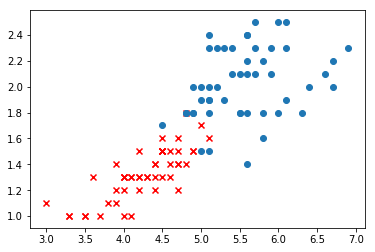

In [9]:
#散布図を出力
plt.scatter(X2[:50,[0]],X2[:50,[1]],color="red",marker="x")
plt.scatter(X2[50:,[0]],X2[50:,[1]])
plt.show()

In [10]:
#データの標準化
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X2_std=ss.fit_transform(X2)

In [11]:
#ホールドアウト法
X2_train,X2_test,y2_train,y2_test=train_test_split(X2_std,y2,
                                    test_size=0.3,random_state=0)

In [12]:
#データの学習
from sklearn.svm import SVC
svm2=SVC(kernel="linear")
svm2.fit(X2_train,y2_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

score:0.966667


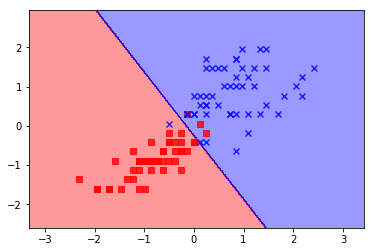

In [13]:
#決定曲線の出力
plot_decision_regions(X2_std,y2,svm2)
#正答率の出力
print("score:%f"%svm2.score(X2_test,y2_test))

In [14]:
#ライブラリの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#データセットの作成
np.random.seed(0)
X3 = np.random.randn(200, 2)
y3 = np.logical_xor(X3[:, 0] > 0, X3[:, 1] > 0)
y3 = np.where(y3, 1, -1)

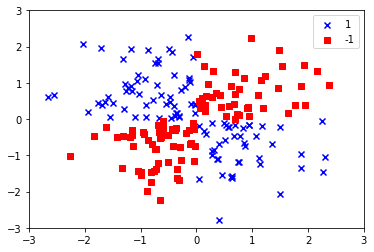

In [15]:
# データのプロット
plt.scatter(X3[y3 == 1, 0], X3[y3 == 1, 1], c='b', marker='x', label='1')
plt.scatter(X3[y3 == -1, 0], X3[y3 == -1, 1], c='r', marker='s', label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best') 
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X3_std=ss.fit_transform(X3)

In [23]:
#ホールドアウト法
from sklearn.model_selection import train_test_split
X3_train,X3_test,y3_train,y3_test=train_test_split(X3_std,y3,
                                        test_size=0.3,random_state=0)

In [24]:
#データの学習
from sklearn.svm import SVC
svm3=SVC(kernel="rbf",gamma=0.1,C=10)
svm3.fit(X3_train,y3_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

score:0.900000


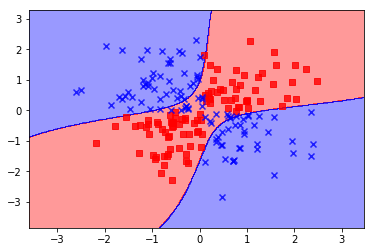

In [26]:
#決定曲線の出力
plot_decision_regions(X3_std,y3,svm3)
#正答率の出力
print("score:%f"%svm3.score(X3_test,y3_test))